In [1]:
import sys,os
import h5py

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.config import DATAPATH,RDRPATH
from wgpack.adcp import readADCP_raw,motion_correct_ADCP_gps_h5py


In [2]:
DATAPATH

'/Users/a1amador/src/wgpack/data'

In [3]:
# file path and name for input .PD0 file
# fnam = "20210515_020002UTC_continuous_20210516.PD0"
fnam = "20220120_073001UTC_continuous.PD0"
adcp_filepath_in = os.path.join(DATAPATH,'adcp',fnam)
# file path and name for output .mat file
fnam_out, file_extension = os.path.splitext(adcp_filepath_in)

# read-in ADCP binaries
adcpr = readADCP_raw(adcp_filepath_in, RDRPATH, adcp_filepath_out=fnam_out, eng_exit=True)


processing 20220120_073001UTC_continuous.PD0

Opening file /Users/a1amador/src/wgpack/data/adcp/20220120_073001UTC_continuous.PD0


***** Apparently a VMDAS file 


*****************************************************
Adjust location by 18 (readbytes=530, hdr.nbyte=546)
 NOTE - If this appears at the beginning of the read, it is
        is a program problem, possibly fixed by a fudge
        PLEASE REPORT TO rich@eos.ubc.ca WITH DETAILS!!

      -If this appears at the end of the file it means
       The file is corrupted and only a partial record has  
       has been read
******************************************************
Record begins at 20-Jan-0022 07:30:10
Ping interval appears to be  00:00:02

Estimating 47462 ensembles in this file
   Reading 47462 ensembles, reducing by a factor of 1
Final result 47462 values
.
*****************************************************
Adjust location by 18 (readbytes=530, hdr.nbyte=546)
 NOTE - If this appears at the beginning of the read, it 

6350..................................................
6400..................................................
6450..................................................
6500..................................................
6550..................................................
6600..................................................
6650..................................................
6700..................................................
6750..................................................
6800..................................................
6850..................................................
6900..................................................
6950..................................................
7000..................................................
7050..................................................
7100..................................................
7150..................................................
7200..................................................
7250......

13750..................................................
13800..................................................
13850..................................................
13900..................................................
13950..................................................
14000..................................................
14050..................................................
14100..................................................
14150..................................................
14200..................................................
14250..................................................
14300..................................................
14350..................................................
14400..................................................
14450..................................................
14500..................................................
14550..................................................
14600...........................................

21200..................................................
21250..................................................
21300..................................................
21350..................................................
21400..................................................
21450..................................................
21500..................................................
21550..................................................
21600..................................................
21650..................................................
21700..................................................
21750..................................................
21800..................................................
21850..................................................
21900..................................................
21950..................................................
22000..................................................
22050...........................................

28500..................................................
28550..................................................
28600..................................................
28650..................................................
28700..................................................
28750..................................................
28800..................................................
28850..................................................
28900..................................................
28950..................................................
29000..................................................
29050..................................................
29100..................................................
29150..................................................
29200..................................................
29250..................................................
29300..................................................
29350...........................................

35950..................................................
36000..................................................
36050..................................................
36100..................................................
36150..................................................
36200..................................................
36250..................................................
36300..................................................
36350..................................................
36400..................................................
36450..................................................
36500..................................................
36550..................................................
36600..................................................
36650..................................................
36700..................................................
36750..................................................
36800...........................................

43250..................................................
43300..................................................
43350..................................................
43400..................................................
43450..................................................
43500..................................................
43550..................................................
43600..................................................
43650..................................................
43700..................................................
43750..................................................
43800..................................................
43850..................................................
43900..................................................
43950..................................................
44000..................................................
44050..................................................
44100...........................................

In [4]:
# read-in processed adcp data
hf = h5py.File(fnam_out+'.mat', 'r')
adcpr = hf['adcpr']

# apply motion correction
dt_gps = 120   # Time-averaging interval for GPS-derived velocities (s)
dt_avg = 120*3 # Time-averaging interval for motion-corrected ADCP velocities (s)
adcpm = motion_correct_ADCP_gps_h5py(adcpr, dt_gps, dt_avg)

print(adcpm.keys())


dict_keys(['time', 'longitude', 'latitude', 'ranges', 'Evel', 'Nvel', 'err_vel', 'Evelf', 'Nvelf', 'cog_gps', 'sog_gps', 'sog_gpse', 'sog_gpsn', 'heading_float', 'headingf_float'])


/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_99366/3714910181.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[0,0].pcolormesh(x,y,U_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_99366/3714910181.py:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0,1].pcolormesh(x,y,V_WG,vmin=-vL, vmax=vL, cmap = cm_msk)
/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_99366/3714910181.p

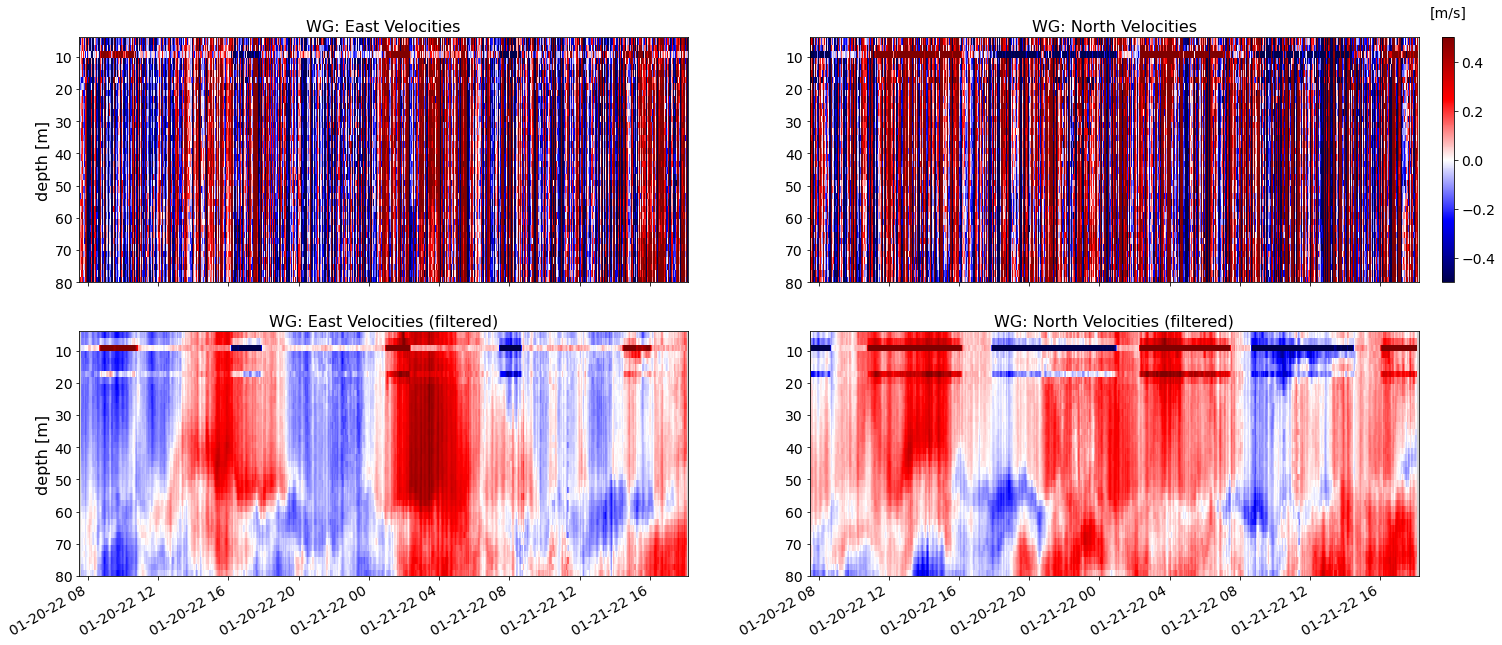

In [5]:
# ----------------------------------------------------------------------------------------------------------------------
# Plot results
# ----------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import numpy as np

# create masked colormap
cm_msk = plt.get_cmap('seismic').copy()
cm_msk.set_bad(color='lightgray')

tt_WG = adcpm['time']
ranges_WG = adcpm['ranges']
# motion-corrected velocities
U_WG = adcpm['Evel']
V_WG = adcpm['Nvel']
# motion-corrected and filtered velocities
Uf_WG = adcpm['Evelf']
Vf_WG = adcpm['Nvelf']

# Plot WG water velocities
yL = [4,80]
uL = 0.5
vL = 0.5
fntsz = 16
labsz = 14
ylab_str = 'depth [m]'

# Do not show vehicle heading
heights = [1,1]
nrows = 2
ncols = 2
gs_kw = dict(height_ratios=heights)
fig, ax = plt.subplots(ncols=ncols, nrows=nrows,
                            sharex=True,
                            sharey=False,
                            gridspec_kw=gs_kw,
                            figsize=(24, 11))


# WG: East Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
c = ax[0,0].pcolormesh(x,y,U_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
ax[0,0].set_ylim(yL)
ax[0,0].set_ylabel(ylab_str,fontsize=fntsz)
ax[0,0].set_title('WG: East Velocities',fontsize=fntsz)
ax[0,0].invert_yaxis()

# WG: North Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
ax[0,1].pcolormesh(x,y,V_WG,vmin=-vL, vmax=vL, cmap = cm_msk)
ax[0,1].set_ylim(yL)
ax[0,1].set_title('WG: North Velocities',fontsize=fntsz)
ax[0,1].invert_yaxis()

# WG: East Vel (filtered)
x,y = np.meshgrid(tt_WG,ranges_WG)
c = ax[1,0].pcolormesh(x,y,Uf_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
ax[1,0].set_ylim(yL)
ax[1,0].set_ylabel(ylab_str,fontsize=fntsz)
ax[1,0].set_title('WG: East Velocities (filtered)',fontsize=fntsz)
ax[1,0].invert_yaxis()

# WG: North Vel (filtered)
x,y = np.meshgrid(tt_WG,ranges_WG)
ax[1,1].pcolormesh(x,y,Vf_WG,vmin=-vL, vmax=vL, cmap = cm_msk)
ax[1,1].set_ylim(yL)
ax[1,1].set_title('WG: North Velocities (filtered)',fontsize=fntsz)
ax[1,1].invert_yaxis()

# rotate and align the tick labels so they look better
ax[0,0].tick_params(labelsize=labsz)
ax[1,0].tick_params(labelsize=labsz)
ax[0,1].tick_params(labelsize=labsz)
ax[1,1].tick_params(labelsize=labsz)

# Define the date format
date_form = DateFormatter("%m-%d-%y %H")
ax[1,1].xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

# add a colorobar
gs = gridspec.GridSpec(ncols=3, nrows=nrows, height_ratios=gs_kw['height_ratios'], right=0.95,figure=fig)
axc = fig.add_subplot(gs[0,-1])
axc.set_visible(False)
cbar = fig.colorbar(c, ax=axc,orientation='vertical')
cax = cbar.ax
# Add label on top of colorbar.
cbar.ax.set_xlabel("[m/s]\n",fontsize=labsz)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=labsz)

fig.show()

/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_99366/3570151667.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[0].pcolormesh(x,y,Uf_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_99366/3570151667.py:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(x,y,Vf_WG,vmin=-vL, vmax=vL, cmap = cm_msk)


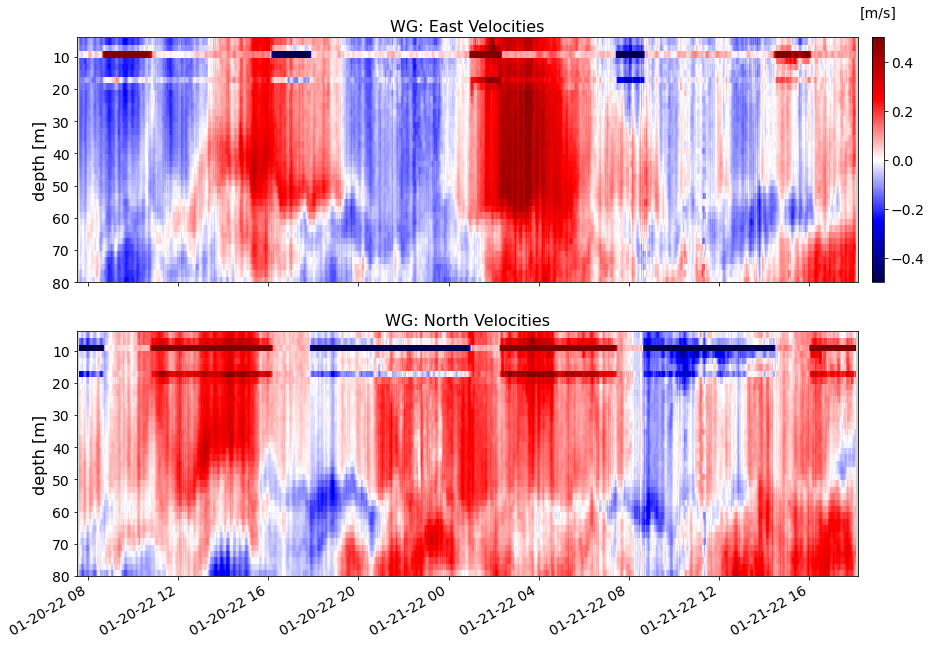

In [7]:
# ----------------------------------------------------------------------------------------------------------------------
# Plot results
# ----------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import numpy as np

# create masked colormap
cm_msk = plt.get_cmap('seismic').copy()
cm_msk.set_bad(color='lightgray')

tt_WG = adcpm['time']
ranges_WG = adcpm['ranges']
# motion-corrected velocities
U_WG = adcpm['Evel']
V_WG = adcpm['Nvel']
# motion-corrected and filtered velocities
Uf_WG = adcpm['Evelf']
Vf_WG = adcpm['Nvelf']

# Plot WG water velocities
yL = [4,80]
uL = 0.5
vL = 0.5
fntsz = 16
labsz = 14
ylab_str = 'depth [m]'

# Do not show vehicle heading
heights = [1,1]
nrows = 2
ncols = 1
gs_kw = dict(height_ratios=heights)
fig, ax = plt.subplots(ncols=ncols, nrows=nrows,
                            sharex=True,
                            sharey=False,
                            gridspec_kw=gs_kw,
                            figsize=(14, 11))


# WG: East Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
c = ax[0].pcolormesh(x,y,Uf_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
ax[0].set_ylim(yL)
ax[0].set_ylabel(ylab_str,fontsize=fntsz)
ax[0].set_title('WG: East Velocities',fontsize=fntsz)
ax[0].invert_yaxis()

# WG: North Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
ax[1].pcolormesh(x,y,Vf_WG,vmin=-vL, vmax=vL, cmap = cm_msk)
ax[1].set_ylim(yL)
ax[1].set_ylabel(ylab_str,fontsize=fntsz)
ax[1].set_title('WG: North Velocities',fontsize=fntsz)
ax[1].invert_yaxis()


# rotate and align the tick labels so they look better
ax[0].tick_params(labelsize=labsz)
ax[1].tick_params(labelsize=labsz)

# Define the date format
date_form = DateFormatter("%m-%d-%y %H")
ax[1].xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

# add a colorobar
gs = gridspec.GridSpec(ncols=3, nrows=nrows, height_ratios=gs_kw['height_ratios'], right=0.95,figure=fig)
axc = fig.add_subplot(gs[0,-1])
axc.set_visible(False)
cbar = fig.colorbar(c, ax=axc,orientation='vertical')
cax = cbar.ax
# Add label on top of colorbar.
cbar.ax.set_xlabel("[m/s]\n",fontsize=labsz)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=labsz)

# fig.show()
